In [13]:
import os
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
dir = "../data"
data_files = os.listdir(dir)
data_files = [s for s in data_files if "output" in s]

In [4]:
dframes = [pd.read_csv(dir + '/' +  file) for file in data_files]
#print(dframes[0].head())

In [10]:
solns = [df.loc[:, df.columns != "walltime"] for df in dframes]
solns = [df.loc[:, df.columns != "t"] for df in solns]

In [27]:
distances = np.zeros((len(solns), len(solns)), dtype="float")
for i in range(distances.shape[0]):
    for j in range(distances.shape[1]):
        sol1_vec = solns[i].values.reshape((solns[i].size, 1))
        sol2_vec = solns[j].values.reshape((solns[j].size, 1))
        distances[i, j] = la.norm(sol1_vec - sol2_vec) / solns[i].size

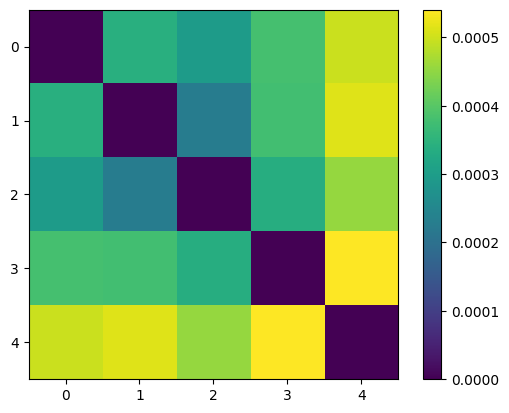

In [28]:
fig, ax = plt.subplots()
mappable = ax.imshow(distances)
plt.colorbar(mappable)